# Лабораторная работа №2

# Вариант 37

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
%pylab inline
from pylab import rcParams
import warnings
warnings.simplefilter('ignore')

df_wine = pd.read_csv("wine.data.txt", header = None)
df_wine.columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine

Populating the interactive namespace from numpy and matplotlib


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

class - Классовый идентификатор  
Alcohol - Содержание алкоголя  
Malic acid - Содержание яблочной кислоты  
Ash - Зольность  
Alcalinity of ash - Содержание щелочи  
Magnesium - Содержание магния
Total phenols - Всего фенолов  
Flavanoids - Флавоноиды  
Nonflavanoid phenols - Нефлаваноидные фенолы  
Proanthocyanins	- Проантоцианидин  
Color intensity - Интенсивность цвета  
Hue - Оттенок  
OD280/OD315 of diluted wines - Разбавленность вин  
Proline - Сорт вина

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [2]:
print("Размер набора данных до удаления:", df_wine.shape)
df_wine = df_wine.drop_duplicates()
print("Размер набора данных после удаления:", df_wine.shape)

Размер набора данных до удаления: (178, 14)
Размер набора данных после удаления: (178, 14)


### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая).

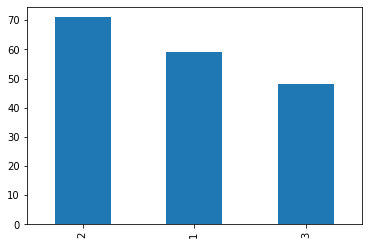

In [3]:
df_wine['class'].value_counts().plot(kind = 'bar') 

Оценка: сбалансированы

### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

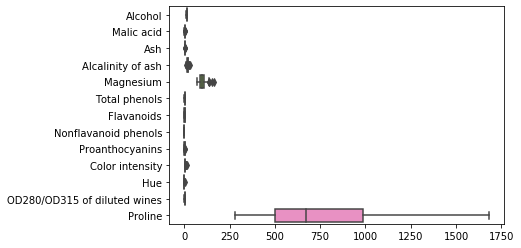

In [4]:
# Числовые признаки
df_numerical = df_wine.drop('class', axis = 1)
sns.boxplot(data = df_numerical, orient = 'h')

#### Способ масштабирования: нормализация

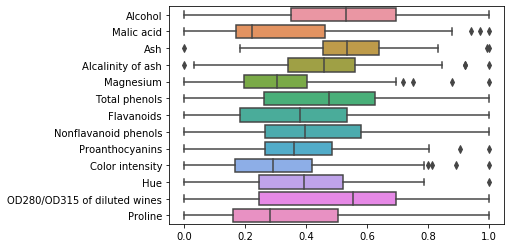

In [5]:
scaler = MinMaxScaler()
columns = df_numerical.columns
df_numerical[columns] = scaler.fit_transform(df_numerical[columns])
sns.boxplot(data = df_numerical, orient = 'h')

### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

In [6]:
df_wine = pd.get_dummies(df_wine, columns = ['class'])
df_wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class_1,class_2,class_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0


### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

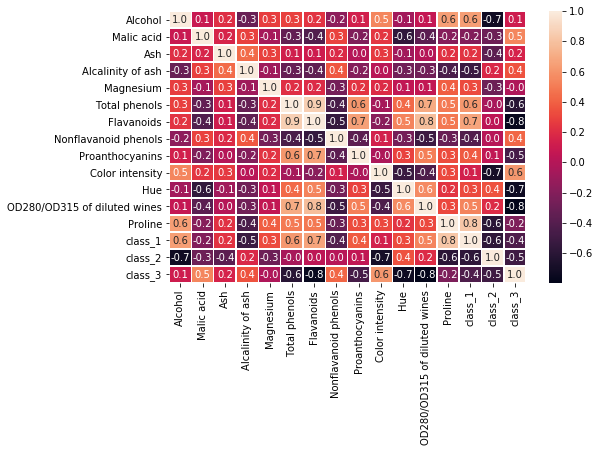

In [7]:
rcParams['figure.figsize'] = 8, 5
sns.heatmap(df_wine.corr(), annot = True, fmt = '.1f', linewidths = .5)

### 7.	Заполните пропущенные значения в данных.

In [8]:
df_wine.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
class_1                         0
class_2                         0
class_3                         0
dtype: int64

Пропущенных значений нет

### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

Кодировка классификаторов:  
2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)  
3 – линейный классификатор (персептрон)

In [9]:
x = df_numerical
y = df_wine['class_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)

In [10]:
knn = RadiusNeighborsClassifier()
parameters_knn = {'radius': np.linspace(1, 5, 25), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, parameters_knn)
grid_knn = grid_knn.fit(x_train, y_train)
R = grid_knn.best_estimator_.n_neighbors

knn = RadiusNeighborsClassifier(n_neighbors = R)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)

print("accuracy:", (accuracy_score(y_test, knn_predict)))
print("best:", (grid_knn.best_score_))

accuracy: 0.8888888888888888
best: 0.9652709359605911


#### Линейный классификатор (персептрон)

In [11]:
ppn = Perceptron()
parameters_pnn = {'alpha': np.linspace(1, 5, 25), 'max_iter': [x for x in range(1, 40)]}
grid_ppn = GridSearchCV(ppn, parameters_pnn) 
grid_ppn = grid_ppn.fit(x_train, y_train)
alpha = grid_ppn.best_estimator_.alpha
max_iter = grid_ppn.best_estimator_.max_iter

ppn = Perceptron(alpha = alpha, max_iter = max_iter)
ppn.fit(x_train, y_train)
y_score = ppn.predict(x_test)

print("accuracy:", accuracy_score(y_test, y_score))
print("best:", grid_ppn.best_score_)

accuracy: 0.9166666666666666
best: 0.9645320197044335


#### PR-кривая

In [12]:
prob_ppn = CalibratedClassifierCV(ppn).fit(x_train, y_train).predict_proba(x_test)
prob_knn = knn.predict_proba(x_test)   

In [13]:
def addPR(prob, occupancy, name, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area, = %f)' % (name, aps))

def addROC(prob, occupancy, name, test):
    tpr, fpr, thresholds = roc_curve(test, prob[:, occupancy])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % (name, roc_auc))

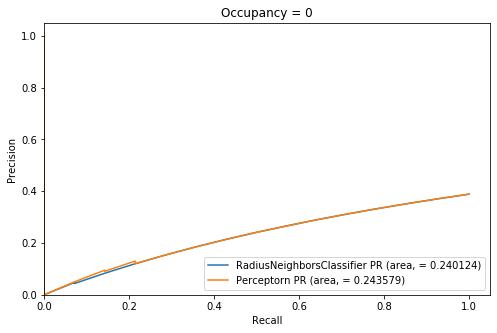

In [14]:
addPR(prob_ppn, 0, 'RadiusNeighborsClassifier', y_test)
addPR(prob_knn, 0, 'Perceptorn', y_test)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Occupancy = 0')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

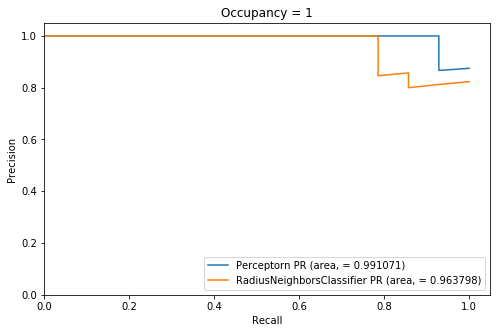

In [15]:
addPR(prob_ppn, 1, 'Perceptorn', y_test)
addPR(prob_knn, 1, 'RadiusNeighborsClassifier', y_test)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Occupancy = 1')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

#### ROC-кривая

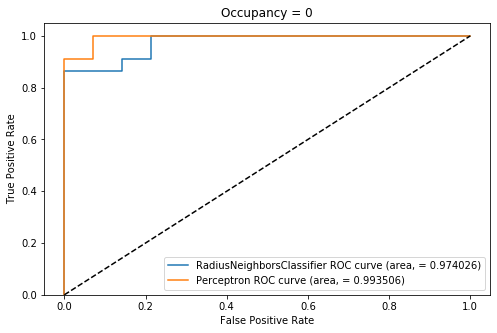

In [16]:
addROC(prob_knn, 0, 'RadiusNeighborsClassifier', y_test)
addROC(prob_ppn, 0, 'Perceptron', y_test)

plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4, fontsize = 'medium')
plt.title('Occupancy = 0')
plt.show()

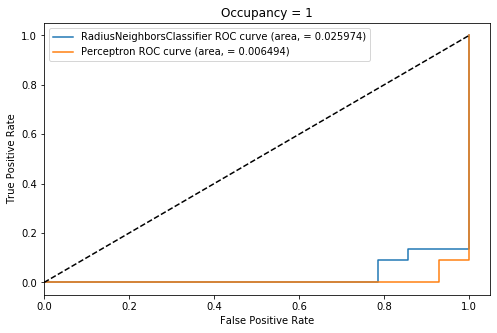

In [17]:
addROC(prob_knn, 1, 'RadiusNeighborsClassifier', y_test)
addROC(prob_ppn, 1, 'Perceptron', y_test)

plt.xlim([0, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 2, fontsize = 'medium')
plt.title('Occupancy = 1')
plt.show()

### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Вывод: классификатор Perceptron лучше